In [ ]:
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:
df = pd.read_csv("/content/sample_data/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0


In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


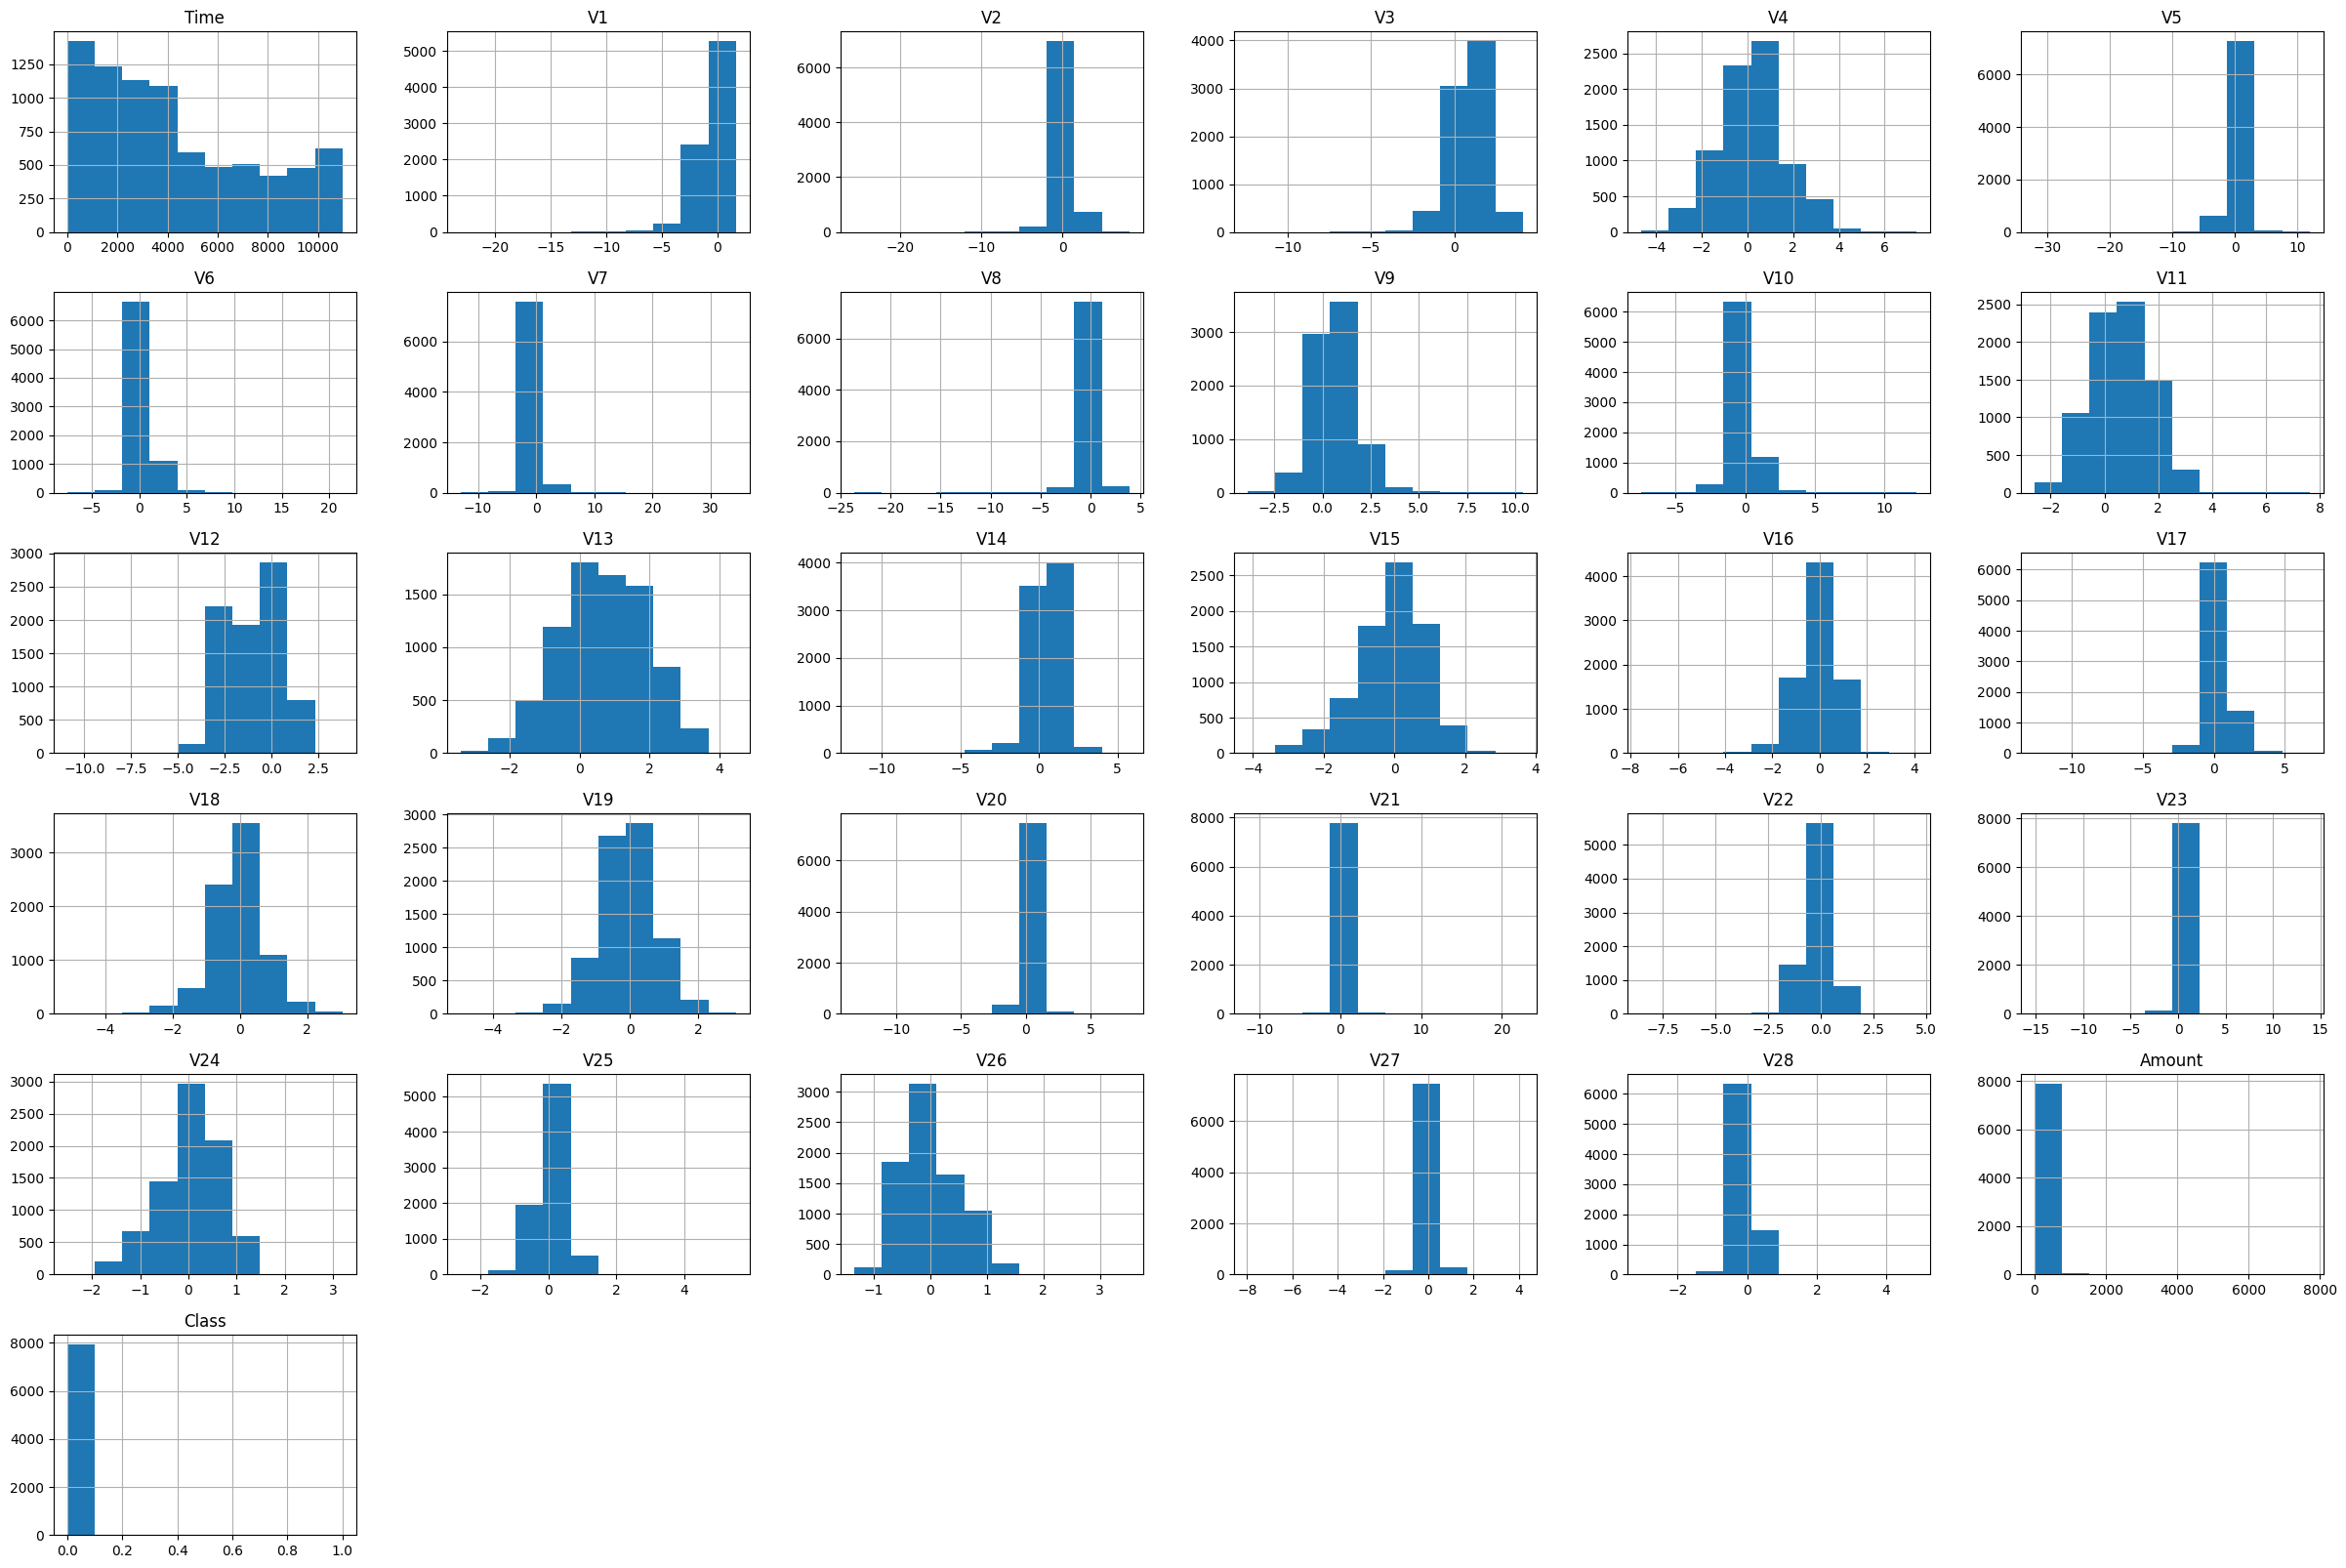

In [ ]:
df.hist(figsize=(30,20))
plt.show()

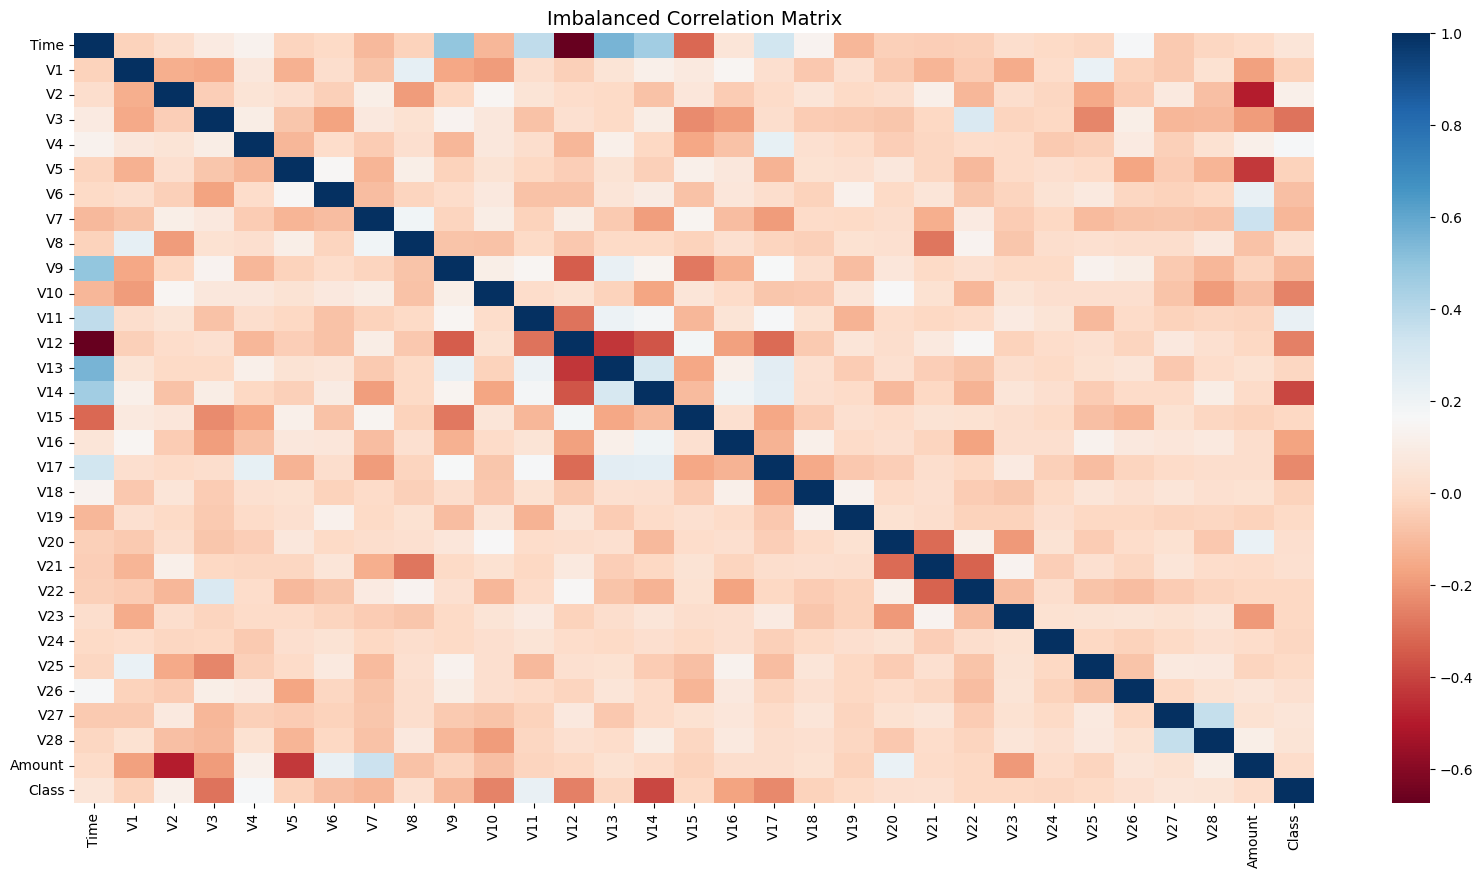

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, cmap="RdBu", ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

<Axes: xlabel='Class', ylabel='count'>

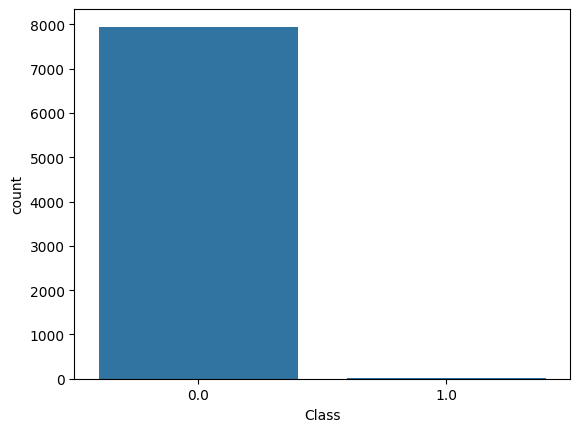

In [ ]:
sns.countplot(x='Class',data=df)

In [ ]:
df = df.dropna(subset=['Class'])

In [ ]:
resampled_X, resampled_Y = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled_df = pd.concat([pd.DataFrame(resampled_X), pd.DataFrame(resampled_Y)], axis=1)
oversampled_df.columns = df.columns
oversampled_df['Class'].value_counts()

Class
0.0    7947
1.0    7947
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

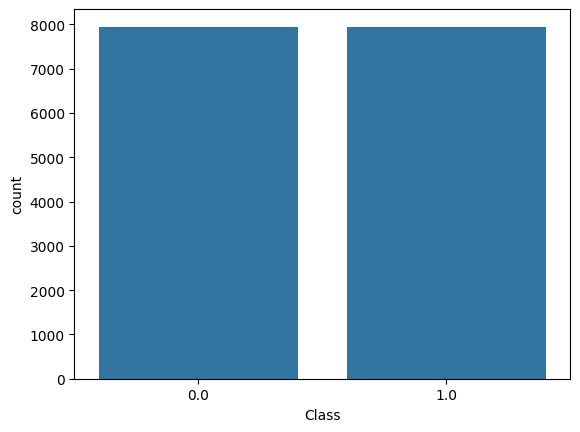

In [ ]:
sns.countplot(x='Class', data=oversampled_df)

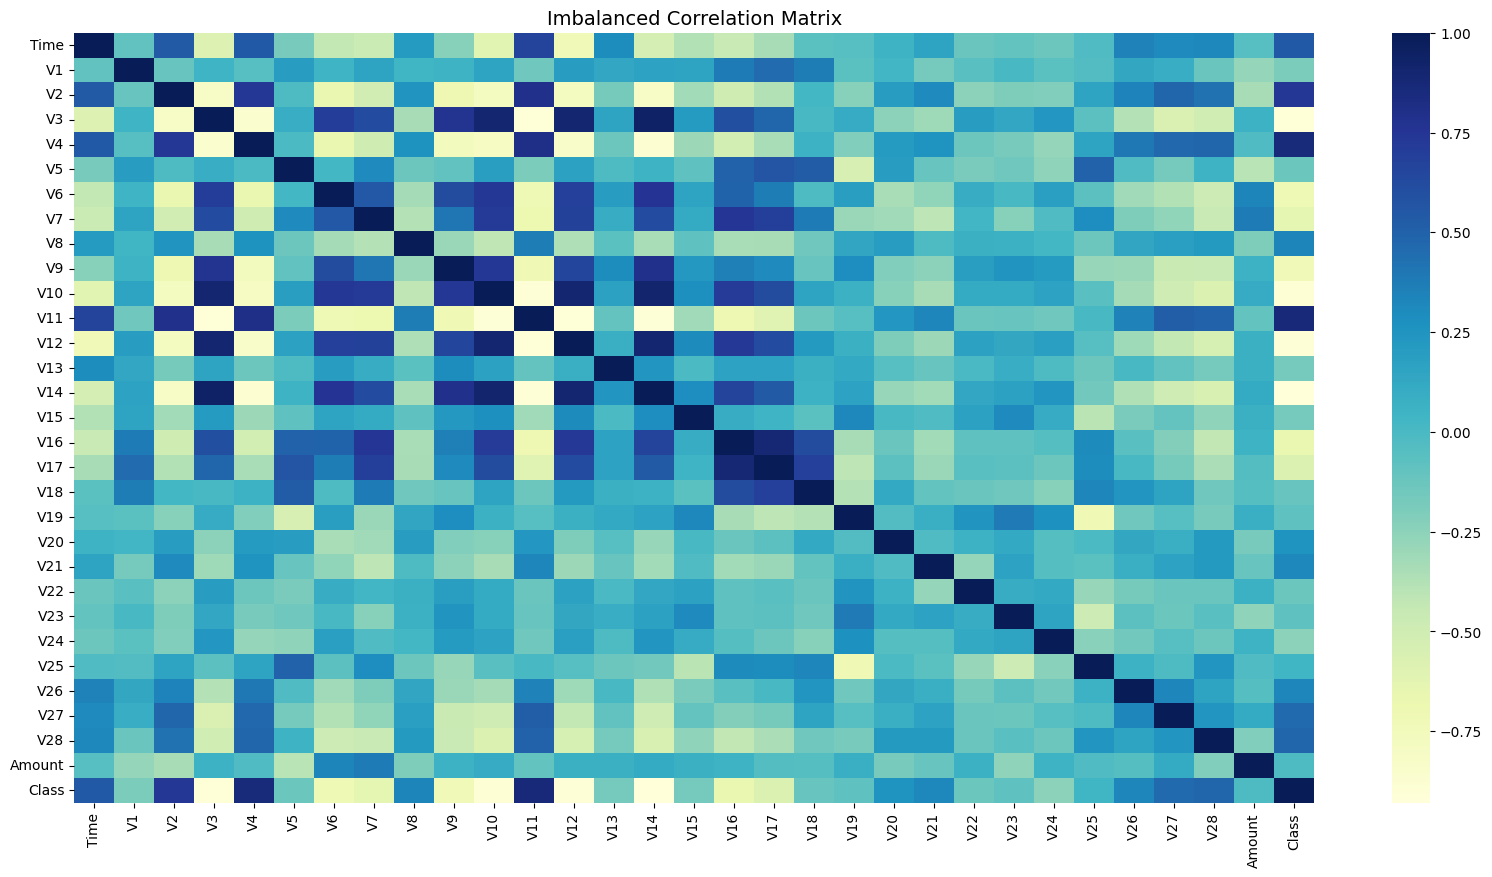

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
corr = oversampled_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [ ]:
sc = StandardScaler()
X = oversampled_df.iloc[:, 1:-1].values
y = oversampled_df.iloc[:, -1].values
y = y.reshape(-1, 1)
print(X.shape, y.shape)

X = sc.fit_transform(X)
print(X[0])

(15894, 29) (15894, 1)
[-0.50334599 -0.92438779  1.40063825 -0.41595366 -0.08891244  0.90064072
  0.76807458 -0.18314115  0.54363929  0.97869472 -1.29545068  1.00352138
 -1.58491113  0.73339661  1.85645416  0.43677228  0.54381745  0.18526847
  0.49960916  0.10694171 -0.26742215  1.00075669 -0.07352603  0.32525938
  0.0133367  -0.80790456 -0.1996291  -0.55540091  0.42757856]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

In [ ]:
x_features = X.shape[1]
y_features = y.shape[1]

In [ ]:
i = Input(shape=(x_features,))

x = Dense(64, activation='relu')(i)
x = Dense(64, activation='relu')(x)
o = Dense(y_features, activation='sigmoid')(x)

model = Model(i,o)
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer=adam)
print(model.summary())
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 64)                1920      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6145 (24.00 KB)
Trainable params: 6145 (24.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
r = model.fit(x_train, y_train, epochs=100, batch_size=512, verbose=1, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/100
22/22 [==============================] - 2s 25ms/step - loss: 0.5892 - accuracy: 0.7303 - val_loss: 0.3530 - val_accuracy: 0.9480
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 0.2468 - accuracy: 0.9579 - val_loss: 0.1525 - val_accuracy: 0.9732
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 0.1163 - accuracy: 0.9764 - val_loss: 0.0794 - val_accuracy: 0.9809
Epoch 4/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0645 - accuracy: 0.9860 - val_loss: 0.0477 - val_accuracy: 0.9948
Epoch 5/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0400 - accuracy: 0.9971 - val_loss: 0.0323 - val_accuracy: 0.9973
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0271 - accuracy: 0.9990 - val_loss: 0.0237 - val_accuracy: 0.9985
Epoch 7/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0197 - accuracy: 0.9994 - val_loss: 0.0185 - val_accuracy: 0.9985
Epoch 8

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=5, verbose=1)
print("Loss: %.2f" % results[0])
print("Acc: %.2f" % results[1])

954/954 [==============================] - 2s 2ms/step - loss: 8.6712e-04 - accuracy: 0.9996
Loss: 0.00
Acc: 1.00


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


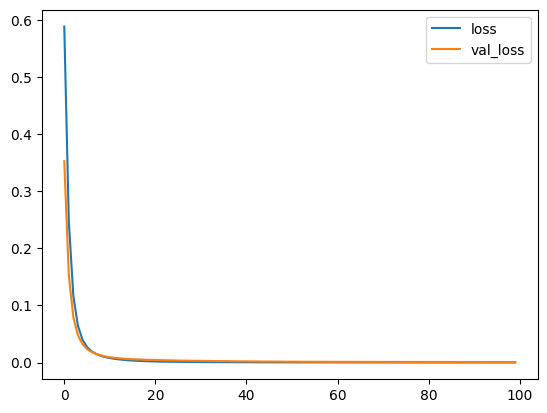

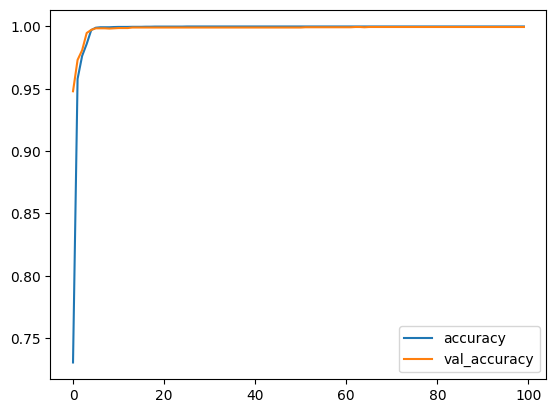

In [ ]:
print(r.history.keys())
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred, decimals=0).astype(int)


150/150 [==============================] - 1s 6ms/step


In [ ]:
df_pred = pd.concat([pd.DataFrame(x_test), pd.DataFrame(y_test)], axis=1)
df_pred.columns = df.drop('Time', axis=1).columns
df_pred.rename(columns={"Class":"Old_class"}, inplace=True)
df_pred['New_class'] = y_pred
cm = pd.crosstab(df_pred["New_class"], df_pred['Old_class'])
true_pos = np.sum(np.diag(cm))
false_pos = cm[0][1]
false_neg = cm[1][0]
precision = true_pos / (true_pos + false_pos) * 100
recall = true_pos / (true_pos + false_neg) * 100
f1 = 2 * (precision * recall) / (precision + recall)
print("Precision: %.3f%%" % (precision))
print("Recall: %.3f%%" % (recall))
print("F1: %.3f%%" % (f1))

Precision: 99.958%
Recall: 100.000%
F1: 99.979%
